### importing libraries

In [72]:
import keras
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

### Load dataset and displays first two rows

In [25]:
data = pd.read_csv("D:/gas_turbine_data.csv")
print(data.head(2))

       AT      AP      AH    AFDP    GTEP     TIT    TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.0  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.0  114.72  10.598   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  


In [ ]:
### Feature column and target variable

In [32]:
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']
target = 'TEY'


In [34]:
X = data[features].values
y = data[target].values


### Scale down the values of X using Min-Max Scaler -- 

In [36]:
mx = MinMaxScaler()
mx.fit(X)
X_scale = mx.transform(X)
X_scale

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

### Seperate the Dataset using Train -Test - Split (0.25)  

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scale,y,test_size=0.25, random_state=1234)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(11279, 10) (11279,)
(3760, 10) (3760,)


### Model Creation ----

In [40]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))


D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [50]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',metrics = ["accuracy"])

In [62]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: 15006.8701 - val_accuracy: 0.0000e+00 - val_loss: 71.7755
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 69.1426 - val_accuracy: 0.0000e+00 - val_loss: 50.9352
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 48.3203 - val_accuracy: 0.0000e+00 - val_loss: 33.0897
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 31.7655 - val_accuracy: 0.0000e+00 - val_loss: 24.3636
Epoch 5/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 24.0242 - val_accuracy: 0.0000e+00 - val_loss: 21.3061
Epoch 6/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 21.4922 - val_accuracy: 0.0000e+00 - val_loss: 18.3668
Epoch 7/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 17.6315 - val_accuracy: 0.0000e+00 - val_loss: 15.0152
Epoch 8/50
282/282 ━━━━━━━━━━━━

In [64]:
# Evaluate the model
loss_and_metrics = model.evaluate(X_train, y_train)
print(f'Test Loss: {loss_and_metrics}')
print(f'Accuracy: {loss_and_metrics}')


353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.7692
Test Loss: [0.7800677418708801, 0.0]
Accuracy: [0.7800677418708801, 0.0]


In [66]:
# Predict on test set
y_pred = model.predict(X_test)
predict = tf.squeeze(y_pred)
predict

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<tf.Tensor: shape=(3760,), dtype=float32, numpy=
array([162.03204, 161.58572, 161.58325, ..., 165.93753, 133.45561,
       129.89713], dtype=float32)>

In [68]:
# Compare predictions with actual values
for i in range(5):
    print(f'Predicted: {y_pred[i][0]}, Actual: {y_test[i]}')

Predicted: 162.03204345703125, Actual: 163.12
Predicted: 161.58572387695312, Actual: 161.23
Predicted: 161.583251953125, Actual: 161.23
Predicted: 133.9227294921875, Actual: 133.9
Predicted: 133.19789123535156, Actual: 134.74


In [ ]:
predict_class = np.array([1 if x >=0.5 else 0 for x in predict])
predict_class

In [70]:
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.8670201941670594
Mean Absolute Error (MAE): 0.6814524420880255
R-squared (R²): 0.996695514276029


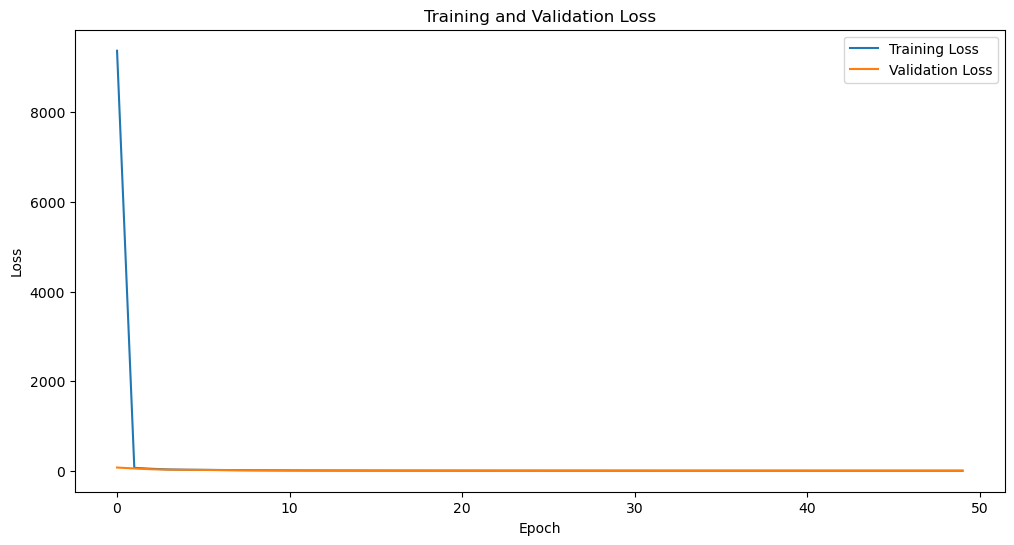

In [76]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


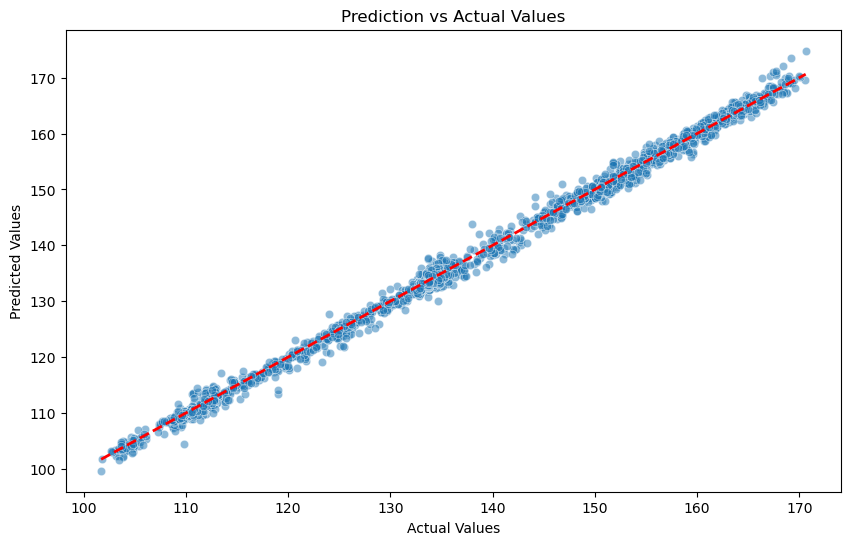

In [74]:

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Values')
plt.show()
